In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train,_),(x_test,_) = fashion_mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

print(x_train.shape)
print(x_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
#utworzenie autoenkodera (obiektowo)

latent_dim = 64
class Autoenkoder(Model):
    def __init__(self,latent_dim) -> None:
        super().__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim,activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784,activation='sigmoid'),
            layers.Reshape((28,28))
        ])

    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
autoencoder = Autoenkoder(latent_dim)

In [4]:
autoencoder.compile(optimizer='adam',loss=losses.MeanSquaredError())
autoencoder.fit(x_train,x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0235 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0091 - val_loss: 0.0094
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0087 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.008

In [5]:
#testowanie autoenkodera na zbiorze testowym
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

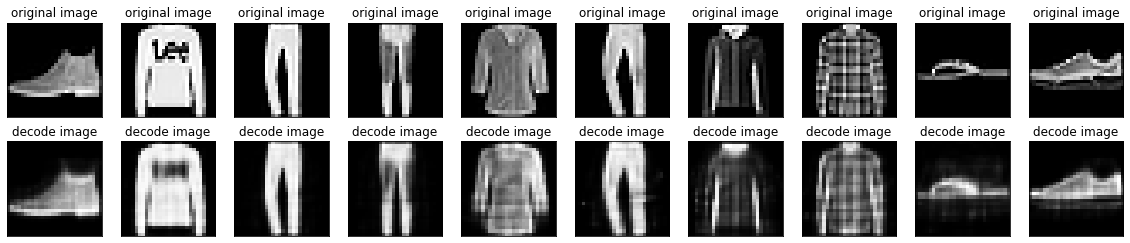

In [6]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i])
    plt.title("original image")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i])
    plt.title("decode image")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()